In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress warnings for clear output
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Assuming test data (X_test, y_test) and trained model saved as "best_gru_model.keras"
# Load test features and labels
X = np.load('/content/drive/MyDrive/data/datasave/rolling_window_sequences.npy')
metadata = pd.read_csv('/content/drive/MyDrive/data/datasave/sequence_metadata_with_RUL.csv')
y = metadata['RUL'].values # Extract RUL from metadata

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/data/datasave/best_gru_model.keras')

In [25]:
y_pred = model.predict(X)
y_pred = y_pred.flatten()

y_pred.shape

551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


(528930,)

In [26]:
# Calculate RMSE and MAE using aligned predictions
rmse = np.sqrt(mean_squared_error(y_true, y_pred_aligned))
mae = mean_absolute_error(y_true, y_pred_aligned)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 60.56835706585498
MAE: 49.210569552099784


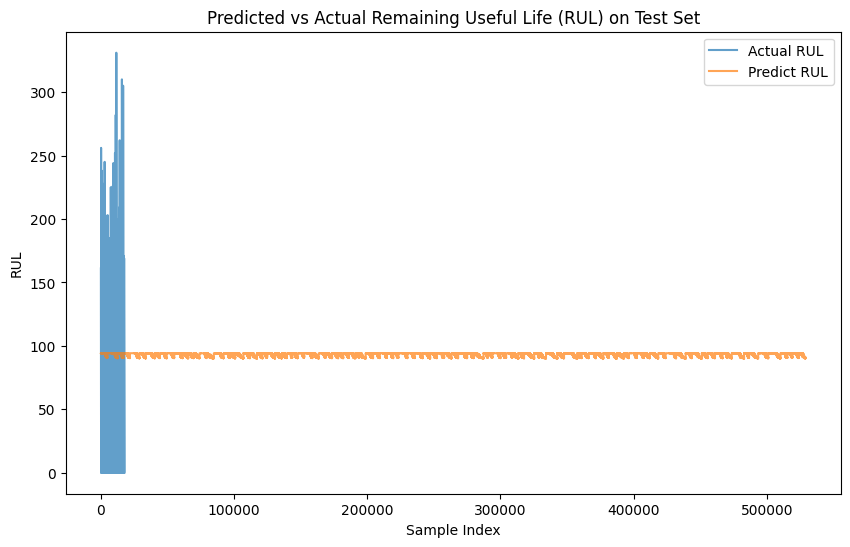

In [27]:
# Visualize Actual vs Predict RUL
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual RUL', alpha=0.7)
plt.plot(y_pred, label='Predict RUL', alpha=0.7)
plt.title('Predicted vs Actual Remaining Useful Life (RUL) on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()